# **Семинар 1 — Управление экспериментами с помощью MLflow**

## **Цель семинара**

На этом семинаре вы познакомитесь с системой **MLflow**, которая используется для трекинга экспериментов в машинном обучении.

Вы научитесь:
- Логировать параметры, метрики и модели.
- Сохранять артефакты (например, графики и файлы).
- Сравнивать результаты разных экспериментов.
- Работать с локальным интерфейсом MLflow UI.

---

## **Зачем нужен MLflow**

В машинном обучении мы редко останавливаемся на первой модели.  
Обычно пробуем десятки комбинаций:
- разные гиперпараметры,
- разные алгоритмы,
- разные версии данных.

Проблема — легко потерять, **какая комбинация дала лучший результат**.

Решение — система трекинга экспериментов.

**MLflow** — популярная open-source платформа, которая помогает хранить:
- параметры (`params`),
- метрики (`metrics`),
- модели (`artifacts`).


## **Установка и запуск MLflow**

Установим библиотеку MLflow и проверим, что она работает.

> В Google Colab локальный UI не откроется напрямую,  
> но мы всё равно можем логировать параметры и метрики.


In [1]:
!pip install mlflow -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.9/753.9 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.5 MB/s eta 0:00:00


Если вы работаете **локально**, запустите интерфейс MLflow в отдельном терминале:

После этого интерфейс будет доступен по адресу  
[http://127.0.0.1:5000](http://127.0.0.1:5000)



## **Базовое логирование параметров и метрик**

Теперь попробуем залогировать эксперимент с простой моделью — **логистической регрессией на Iris**.


In [ ]:
import mlflow
import mlflow.sklearn
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загружаем данные
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

# Начинаем эксперимент
with mlflow.start_run():
    # Гиперпараметр
    C = 0.5
    model = LogisticRegression(C=C, max_iter=200)
    model.fit(X_train, y_train)

    # Оценка
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Логирование параметров и метрик
    mlflow.log_param("C", C)
    mlflow.log_metric("accuracy", acc)

    # Сохранение модели
    mlflow.sklearn.log_model(model, "model")

print("Эксперимент завершён и записан в MLflow")
print(f"Accuracy: {acc:.4f}")


/usr/local/lib/python3.12/dist-packages/mlflow/tracking/_tracking_service/utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)
2025/11/10 14:53:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/10 14:53:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Эксперимент завершён и записан в MLflow
Accuracy: 1.0000


## **Сравнение экспериментов**

Обычно мы подбираем гиперпараметры, чтобы улучшить качество модели.  
Попробуем логировать несколько запусков с разными значениями `C`.


In [ ]:
from sklearn.metrics import accuracy_score

for C in [0.1, 0.5, 1.0, 10.0]:
    with mlflow.start_run():
        model = LogisticRegression(C=C, max_iter=200)
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))

        mlflow.log_param("C", C)
        mlflow.log_metric("accuracy", acc)

print("Все эксперименты залогированы")


Все эксперименты залогированы


## **Логирование артефактов**

MLflow позволяет сохранять не только метрики, но и любые файлы: графики, конфиги, модели.  
Рассмотрим пример: сохраним график результатов классификации.


График сохранён как артефакт MLflow (plot.png)


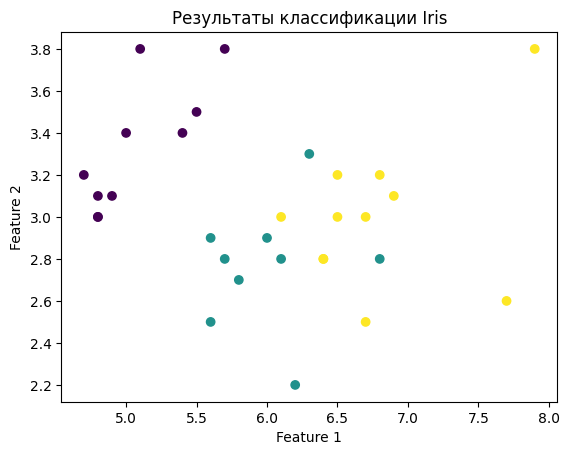

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

model = LogisticRegression(C=1.0, max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title("Результаты классификации Iris")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig("plot.png")

with mlflow.start_run():
    mlflow.log_artifact("plot.png")
    mlflow.log_param("C", 1.0)
    mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred))

print("График сохранён как артефакт MLflow (plot.png)")


## **Просмотр экспериментов**

Если вы работаете **локально**, запустите MLflow UI:


и откройте [http://localhost:5000](http://localhost:5000).

Вы увидите таблицу с экспериментами, где можно сравнить метрики и параметры.



## **Проведение серии экспериментов**

Теперь проведём **несколько запусков** с разными значениями `C` и `max_iter`.  
Залогируем все параметры и метрики, чтобы потом сравнить их результаты.


In [ ]:
import numpy as np

Cs = [0.1, 0.5, 1.0, 5.0]
iters = [100, 200, 400]

results = []

for C in Cs:
    for max_iter in iters:
        with mlflow.start_run():
            model = LogisticRegression(C=C, max_iter=max_iter)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)

            mlflow.log_param("C", C)
            mlflow.log_param("max_iter", max_iter)
            mlflow.log_metric("accuracy", acc)

            results.append((C, max_iter, acc))

print("Все эксперименты завершены и залогированы.")


Все эксперименты завершены и залогированы.


## **Сравнение результатов экспериментов**

Выведем таблицу со значениями `C`, `max_iter` и `accuracy`.  
Так можно быстро увидеть, какие параметры дали лучший результат.


In [ ]:
import pandas as pd

df_results = pd.DataFrame(results, columns=["C", "max_iter", "accuracy"])
df_results = df_results.sort_values(by="accuracy", ascending=False)
df_results.reset_index(drop=True, inplace=True)
df_results


,C,max_iter,accuracy
0,0.1,100,1.0
1,0.1,200,1.0
2,0.1,400,1.0
3,0.5,100,1.0
4,0.5,200,1.0
5,0.5,400,1.0
6,1.0,100,1.0
7,1.0,200,1.0
8,1.0,400,1.0
9,5.0,100,1.0


## **Визуализация лучших экспериментов**

Построим тепловую карту точности в зависимости от параметров `C` и `max_iter`.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot = df_results.pivot("C", "max_iter", "accuracy")

plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, cmap="Blues")
plt.title("Точность модели при разных C и max_iter")
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

## **Логирование графика как артефакта**

Сохраним график классификации точек и добавим его в MLflow как артефакт.


График сохранён и залогирован как артефакт MLflow.


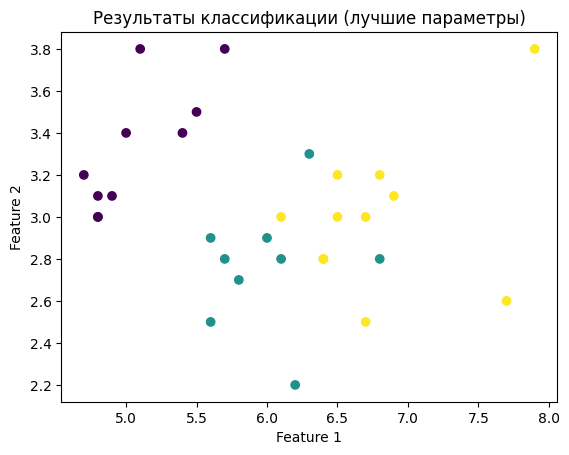

In [ ]:
model_best = LogisticRegression(C=df_results.iloc[0]["C"],
                                max_iter=int(df_results.iloc[0]["max_iter"]))
model_best.fit(X_train, y_train)
y_pred = model_best.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.title("Результаты классификации (лучшие параметры)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.savefig("best_plot.png")

with mlflow.start_run():
    mlflow.log_param("C_best", df_results.iloc[0]["C"])
    mlflow.log_param("max_iter_best", df_results.iloc[0]["max_iter"])
    mlflow.log_metric("accuracy_best", df_results.iloc[0]["accuracy"])
    mlflow.log_artifact("best_plot.png")

print("График сохранён и залогирован как артефакт MLflow.")



## **Выводы**

Мы провели серию экспериментов с разными параметрами `C` и `max_iter`,  
залогировали их результаты и визуализировали влияние параметров на точность модели.

Вы научились:
- Логировать параметры, метрики и артефакты.
- Сравнивать результаты экспериментов.
- Сохранять графики как артефакты MLflow.

Для локальной работы можно запустить интерфейс:

и открыть [http://127.0.0.1:5000](http://127.0.0.1:5000)


In [ ]:
import mlflow
import mlflow.sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

print("MLflow version:", mlflow.__version__)


## Что такое MLflow Tracking и зачем он вообще нужен?

**Проблема без MLflow:**

* Модели тренируются в ноутбуках «как попало».
* Гиперпараметры и метрики хранятся:
  - в голове;
  - в названии файла (`model_final_final_3_really_best.pkl`);
  - в скриншотах TensorBoard.
* Через месяц никто не помнит:
  - *какой код* породил *эту модель*;
  - на *каких данных* она обучалась;
  - какие именно *гиперпараметры* были лучше.

**MLflow Tracking решает это так:**

* Каждому запуску (run) соответствует:
  - набор **параметров (params)**;
  - набор **метрик (metrics)**;
  - **артефакты (artifacts)** — файлы, картинки, модели;
  - служебная инфа: кто запустил, когда, на каком хосте, с каким кодом.
* Всё это можно:
  - посмотреть в **WEB-интерфейсе**;
  - сравнить между собой разные запуски;
  - автоматически искать «лучшую» модель по метрикам.

Далее будем показывать это на простых примерах, чтобы не грузить железо.


In [ ]:
import os

# Указываем директорию для локальных логов MLflow
mlflow.set_tracking_uri("file://" + os.path.abspath("mlruns"))

# Создаем (или выбираем) эксперимент
experiment_name = "seminar_mlflow_basics"
mlflow.set_experiment(experiment_name)

experiment = mlflow.get_experiment_by_name(experiment_name)
print("Текущий эксперимент:", experiment.name)
print("ID эксперимента:", experiment.experiment_id)
print("Логи хранятся в:", mlflow.get_tracking_uri())


## Кейc 1. Первый эксперимент: ручное логирование параметров и метрик

Сценарий:

1. Берём датасет Iris из sklearn.
2. Делим на train / test.
3. Обучаем **LogisticRegression** с заданными параметрами.
4. Логируем:
   - параметры модели (`C`, `solver`, `max_iter`);
   - метрики (`accuracy` на train и test);
   - артефакт: матрицу ошибок в виде картинки.

Задача — показать *минимальный* полезный пример.


In [ ]:
# Загружаем датасет Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Форма X_train:", X_train.shape)
print("Форма X_test:", X_test.shape)


In [ ]:
C_value = 1.0
solver = "lbfgs"
max_iter = 200

with mlflow.start_run(run_name="logreg_manual_logging") as run:
    # Логируем гиперпараметры
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("C", C_value)
    mlflow.log_param("solver", solver)
    mlflow.log_param("max_iter", max_iter)

    # Обучаем модель
    model = LogisticRegression(C=C_value, solver=solver, max_iter=max_iter)
    model.fit(X_train, y_train)

    # Считаем метрики
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    # Логируем метрики
    mlflow.log_metric("accuracy_train", acc_train)
    mlflow.log_metric("accuracy_test", acc_test)

    print("Train accuracy:", acc_train)
    print("Test accuracy:", acc_test)

    # Матрица ошибок и логирование картинки как артефакта
    cm = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, cmap="Blues")
    ax.set_title("Confusion matrix")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    plt.colorbar(im, ax=ax)
    plt.tight_layout()

    # Сохраняем картинку
    os.makedirs("artifacts", exist_ok=True)
    fig_path = os.path.join("artifacts", "confusion_matrix_logreg.png")
    plt.savefig(fig_path)
    plt.close(fig)

    # Логируем картинку как артефакт
    mlflow.log_artifact(fig_path, artifact_path="plots")

    print("Run ID:", run.info.run_id)


### Обсуждение: метрики и артефакты

* Мы вручную залогировали:
  - параметры (`log_param`);
  - метрики (`log_metric`);
  - артефакт — PNG-файл матрицы ошибок (`log_artifact`).
* Всё это можно увидеть в веб-интерфейсе:

```bash
mlflow ui



---

### 🧩 Ячейка 10 — Markdown (авто-логирование)

```markdown
## Кейc 2. Авто-логирование с помощью `mlflow.sklearn.autolog()`

Ручное логирование — гибко, но многословно.  
Во многих проектах достаточен **автоматический режим**:

* MLflow сам логирует:
  - гиперпараметры модели;
  - метрики (train/test);
  - структуру модели;
  - даже некоторые артефакты.

Сейчас покажем, как включается `autolog()` и чем он удобен / опасен.


In [ ]:
# Включаем автологирование для моделей sklearn
mlflow.sklearn.autolog(log_input_examples=True, log_model_signatures=True)

with mlflow.start_run(run_name="rf_autolog") as run:
    rf = RandomForestClassifier(
        n_estimators=50,
        max_depth=4,
        random_state=42,
        n_jobs=-1,
    )
    rf.fit(X_train, y_train)

    # Для наглядности сами посчитаем accuracy (они всё равно будут залогированы автологом)
    y_pred_test = rf.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    print("Test accuracy (RF):", acc_test)
    print("Run ID:", run.info.run_id)


## Кейc 3. Серия экспериментов + поиск "лучшей" модели

Реальный use-case:

* Нам нужно протестировать **разные гиперпараметры** (например, `n_estimators`, `max_depth`).
* Мы запускаем **много run'ов**, каждый со своими параметрами.
* Потом используем `mlflow.search_runs`, чтобы:
  - найти все запуски в данном эксперименте;
  - отсортировать их по метрике (`accuracy_test`);
  - выбрать «победителя».

Сейчас реализуем маленький grid-search поверх RandomForest.


In [ ]:
# На всякий случай отключим автолог, чтобы контролировать логируемое
mlflow.sklearn.autolog(disable=True)

n_estimators_list = [10, 30, 50, 100]
max_depth_list = [2, 4, 6, None]

for n_est in n_estimators_list:
    for max_depth in max_depth_list:
        with mlflow.start_run(run_name=f"rf_n{n_est}_depth{max_depth}") as run:
            mlflow.log_param("model_type", "RandomForestClassifier")
            mlflow.log_param("n_estimators", n_est)
            mlflow.log_param("max_depth", max_depth)

            rf = RandomForestClassifier(
                n_estimators=n_est,
                max_depth=max_depth,
                random_state=42,
                n_jobs=-1,
            )
            rf.fit(X_train, y_train)

            y_pred_test = rf.predict(X_test)
            acc_test = accuracy_score(y_test, y_pred_test)
            mlflow.log_metric("accuracy_test", acc_test)

            print(f"Run {run.info.run_id}: n_estimators={n_est}, max_depth={max_depth}, acc={acc_test:.4f}")


In [ ]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
exp = mlflow.get_experiment_by_name(experiment_name)

# Считываем все run'ы данного эксперимента в pandas.DataFrame
runs_df = mlflow.search_runs(
    experiment_ids=[exp.experiment_id],
    filter_string="",
    output_format="pandas"
)

# Оставим только наши RF-запуски и нужные колонки
cols_to_show = [
    "run_id",
    "params.n_estimators",
    "params.max_depth",
    "metrics.accuracy_test"
]
rf_runs = runs_df.dropna(subset=["metrics.accuracy_test"])[cols_to_show]

display(rf_runs.sort_values("metrics.accuracy_test", ascending=False).head(10))


### Обсуждение: а где здесь MLOps?

То, что мы сделали:

* Автоматически собираем **таблицу экспериментов** в MLflow.
* Можно:
  - сортировать по любой метрике;
  - фильтровать по параметрам (`params.*`);
  - делать SQL-подобные запросы.

Если:
* обернуть это в пайплайн (Airflow / Prefect / Kubeflow),
* подключить модельный реестр (Model Registry),
* и сделать скрипт деплоя модели из MLflow,

то мы получим **полноценный цикл**:
> данные → обучение → логирование → выбор лучшей модели → деплой.

Даже на таком маленьком примере студентам уже видно, как это масштабируется.


## Кейc 4. Логируем и загружаем модель как MLflow Model

Сейчас:

1. Обучим ещё одну модель (RandomForest).
2. Сохраним её через `mlflow.sklearn.log_model`.
3. Загрузим её назад через `mlflow.pyfunc.load_model`.
4. Убедимся, что можем использовать модель **без ноутбука и исходного кода** — зная только путь к артефакту.

Это уже шаг к деплою модели в прод.


In [ ]:
mlflow.sklearn.autolog(disable=True)

with mlflow.start_run(run_name="rf_for_serving") as run:
    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        random_state=42,
        n_jobs=-1,
    )
    rf.fit(X_train, y_train)

    y_pred_test = rf.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred_test)
    mlflow.log_metric("accuracy_test", acc_test)

    # Логируем модель
    mlflow.sklearn.log_model(
        sk_model=rf,
        artifact_path="model",
        registered_model_name=None  # без реестра, просто артефакт
    )

    model_uri = f"runs:/{run.info.run_id}/model"
    print("Model URI:", model_uri)
    print("Test accuracy:", acc_test)


In [ ]:
import mlflow.pyfunc

# Подставь сюда model_uri из предыдущей ячейки (можно оставить как есть, если ячейки идут подряд)
loaded_model = mlflow.pyfunc.load_model(model_uri=model_uri)

# Проверим, что модель работает
sample = X_test[:5]
preds = loaded_model.predict(sample)

print("Sample true labels:", y_test[:5])
print("Sample predictions:", preds)


## Кейc 5. Теги, nested runs и организация экспериментов

Дополнительные фишки, которые часто недооценивают:

* **Теги (tags)** — позволяют логически группировать эксперименты:
  - `mlflow.set_tag("data_version", "v1.2")`
  - `mlflow.set_tag("team", "research")`
  - `mlflow.set_tag("use_case", "credit_scoring")`
* **Nested runs** — удобно, когда есть один "главный" запуск,
  - а внутри мы перебираем гиперпараметры;
  - или логируем подзадачи (preprocessing, обучение, оценка).

Пример кода — как заготовка для обсуждения.


In [ ]:
mlflow.sklearn.autolog(disable=True)

with mlflow.start_run(run_name="big_experiment") as parent_run:
    mlflow.set_tag("project", "seminar_mlflow")
    mlflow.set_tag("data_version", "iris_v1")

    for depth in [2, 4, 6]:
        with mlflow.start_run(
            run_name=f"child_depth_{depth}", nested=True
        ) as child_run:
            mlflow.log_param("parent_run_id", parent_run.info.run_id)
            mlflow.log_param("max_depth", depth)

            rf = RandomForestClassifier(
                n_estimators=50,
                max_depth=depth,
                random_state=42,
                n_jobs=-1,
            )
            rf.fit(X_train, y_train)
            y_pred_test = rf.predict(X_test)
            acc_test = accuracy_score(y_test, y_pred_test)

            mlflow.log_metric("accuracy_test", acc_test)
            print(
                f"[Child run] depth={depth}, acc={acc_test:.4f}, run_id={child_run.info.run_id}"
            )

print("Parent run ID:", parent_run.info.run_id)


# Итоги семинара

Мы посмотрели на MLflow с практической стороны:

1. **Tracking**:
   - логирование параметров, метрик и артефактов;
   - веб-интерфейс MLflow UI.
2. **Авто-логирование** (`mlflow.sklearn.autolog`):
   - удобно для быстрых экспериментов;
   - но важно понимать, что именно логируется.
3. **Серии экспериментов**:
   - один эксперимент = много run'ов;
   - `mlflow.search_runs` позволяет выбирать лучшую модель по метрикам.
4. **MLflow Models**:
   - логирование модели;
   - загрузка и использование без исходного кода.
5. **Организация экспериментов**:
   - теги, nested runs, структура проектов.

---

## Вопросы для обсуждения со студентами

1. Что будет, если **потерять логи MLflow**, но сохранить только файл модели?
2. В каких случаях **авто-логирование** может быть *опасным* или недостаточным?
3. Как бы вы встроили MLflow в:
   - пайплайн с Airflow;
   - A/B-тестирование моделей;
   - LLM/чат-бот систему?
4. Как вы организовали бы эксперименты в команде из 5–10 человек:
   - единый эксперимент;
   - разные эксперименты по проектам;
   - соглашения по тегам?

---

Дальнейшие шаги (если будет вторая часть):

* Подключение **удалённой БД** (PostgreSQL) вместо файлового бэкенда.
* Использование **Model Registry** (Staging / Production).
* Интеграция с **CI/CD и авто-деплоем**.
